In [22]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats

In [23]:
df = pd.read_csv('CH06PR15_PatientSatisfaction.txt', sep='\s+', names=['y', 'x1', 'x2', 'x3'])
X = df[['x1', 'x2', 'x3']]
Y = df['y']
df

,y,x1,x2,x3
0,48,50,51,2.3
1,57,36,46,2.3
2,66,40,48,2.2
3,70,41,44,1.8
4,89,28,43,1.8
5,36,49,54,2.9
6,46,42,50,2.2
7,54,45,48,2.4
8,26,52,62,2.9
9,77,29,50,2.1


# a. Prepare a scatter plot for each of the predictor variables vs. 𝑌. Are any noteworthy features revealed by these plots where patient satisfaction (Y) and patient’s age (𝑋1, in years), severity of illness (𝑋2, an index), and anxiety level (𝑋3, an index)?


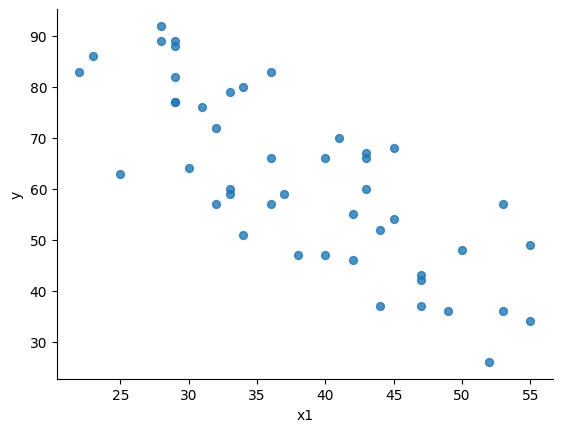

In [24]:
df.plot(kind='scatter', x='x1', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

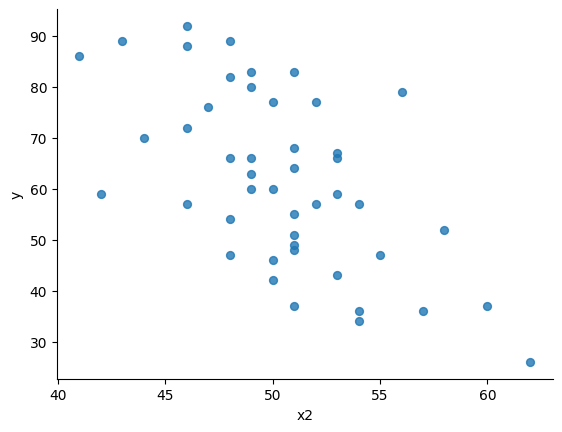

In [25]:
df.plot(kind='scatter', x='x2', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

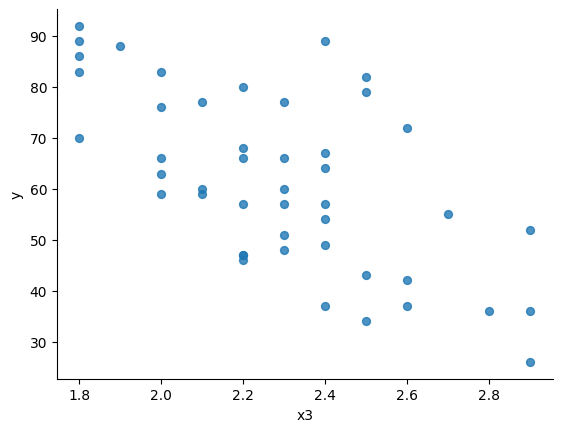

In [26]:
df.plot(kind='scatter', x='x3', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The scatter plot between patient satisfaction (Y) and each of the predictor variables shows an decreased trend, suggesting that older, severvely ill, anxious patients tend to report lower satisfaction. Although all plots still remain outliers, severity of illness and anxiety level seem to have more outliers than age.  
# b. Obtain the scatter plot matrix and the correlation matrix. Interpret these and state your principal findings.


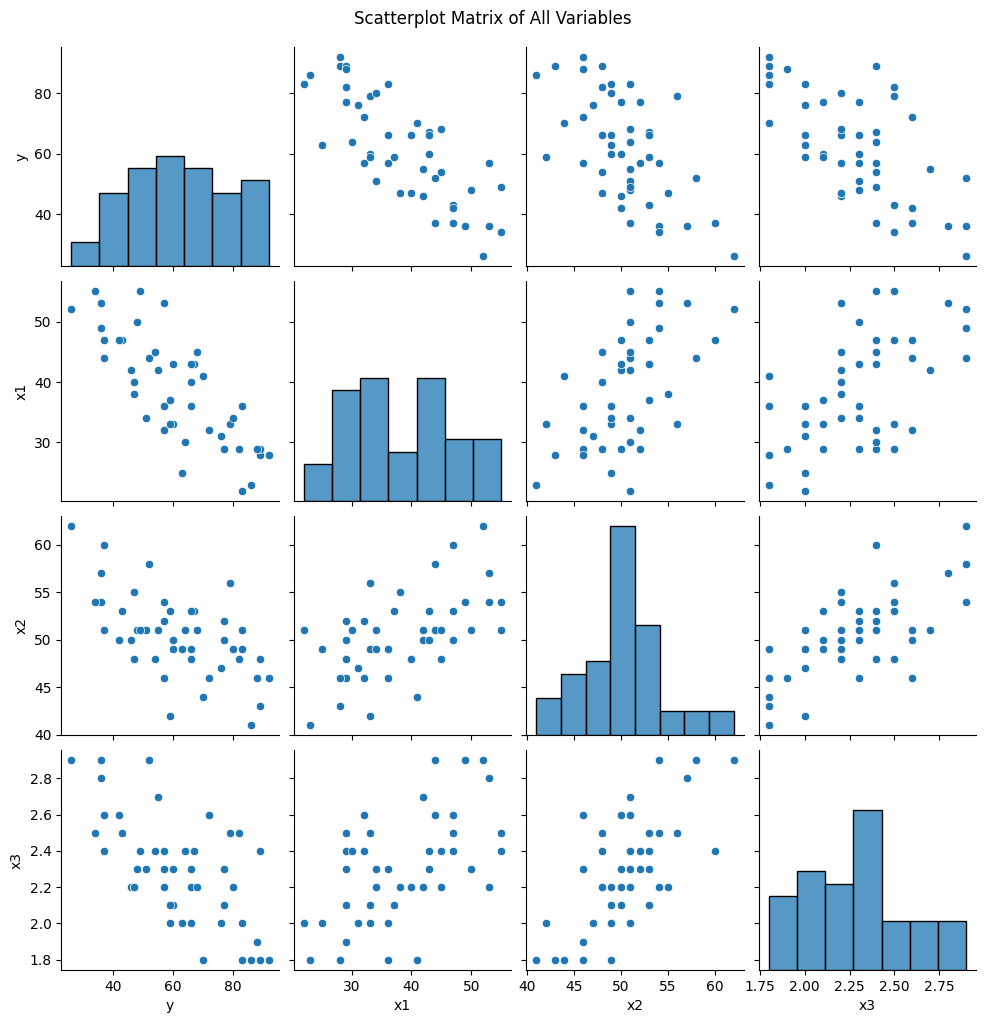

In [27]:
sns.pairplot(df)
plt.suptitle('Scatterplot Matrix of All Variables', y=1.02)
plt.show()

           y        x1        x2        x3
y   1.000000 -0.786756 -0.602942 -0.644591
x1 -0.786756  1.000000  0.567950  0.569677
x2 -0.602942  0.567950  1.000000  0.670529
x3 -0.644591  0.569677  0.670529  1.000000


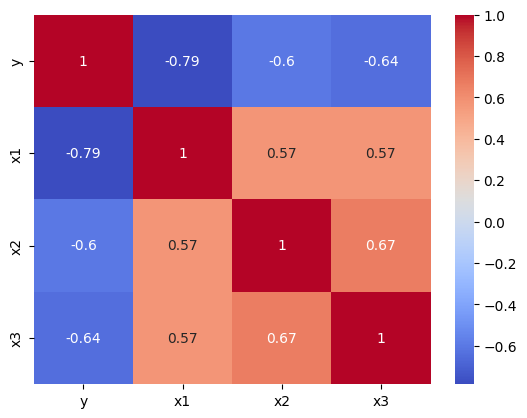

In [28]:
# Calculate and display the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix);

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show();


y has strong negative correlations with x1, x2, x3, suggesting that as these predictor variables increase, y decreases. Some scatter plots suggest possible outliers, which could influence regression or modeling results    
# c. Calculate coefficients in regression model for three predictor variables and state the estimated regression function. How is 𝑏2 interpreted here?


In [29]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.54e-10
Time:                        16:20:24   Log-Likelihood:                -169.36
No. Observations:                  46   AIC:                             346.7
Df Residuals:                      42   BIC:                             354.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.4913     18.126      8.744      0.0

In [30]:
import numpy.linalg as linalg

XtX = X.T @ X
inv_XtX = linalg.inv(XtX)
inv_XtXXt = inv_XtX @ X.T
beta_hat = inv_XtXXt @ Y
print(XtX)
print(inv_XtX)
print(inv_XtXXt)

b = np.matmul(inv_XtXXt, Y)
print(b)

        const       x1        x2       x3
const    46.0   1766.0    2320.0   105.20
x1     1766.0  71378.0   90051.0  4107.20
x2     2320.0  90051.0  117846.0  5344.70
x3      105.2   4107.2    5344.7   244.62
[[ 3.24771165e+00  9.22113909e-03 -6.79307897e-02 -6.72988166e-02]
 [ 9.22113909e-03  4.56081632e-04 -3.18595528e-04 -4.66227126e-03]
 [-6.79307897e-02 -3.18595528e-04  2.39248144e-03 -1.77100848e-02]
 [-6.72988166e-02 -4.66227126e-03 -1.77100848e-02  4.98257730e-01]]
         0         1         2         3         4         5         6   \
0  0.089511  0.300069  0.207822  0.515686  0.463742 -0.163882  0.090403   
1  0.005054  0.000261  0.001915  0.005510 -0.000100  0.000844  0.002190   
2 -0.002577 -0.010079 -0.004798 -0.007602 -0.005853 -0.005707 -0.000650   
3 -0.057634  0.096188 -0.007707 -0.140832 -0.062512  0.192853 -0.052451   

         7         8         9   ...        36        37        38        39  \
0  0.240468 -0.679665 -0.022742  ...  0.086200 -0.101642 -0.55625

In [31]:
print(beta_hat)

0    158.491252
1     -1.141612
2     -0.442004
3    -13.470163
dtype: float64


Estimated regression function: y = 158.4913 - 1.1416x1 - 0.4420x2 - 13.4702x3  
It means that for every one-unit increase in x2, the predicted value of y decreases by b2 unit, which is 0.442 units, holding x1 and x3 constant  
# d. Obtain the residuals and prepare a box plot of the residuals. Do there appear to be any outliers?


In [32]:
b0 = 158.4913
b1 = -1.1416
b2 = -0.4420
b3 = -13.4702
y_hat = b0 + b1*df['x1'] + b2*df['x2'] + b3*df['x3']
residual = df['y'] - y_hat
print(residual)
#print(model.resid)

0      0.11216
1     -9.08024
2      4.02314
3      2.00866
4      5.72586
5     -3.62132
6    -12.80966
7      0.42518
8     -6.66052
9      2.00252
10    17.15958
11    13.35198
12   -14.16606
13   -15.15344
14    12.51594
15    -2.79530
16    16.60900
17     8.54048
18   -10.87308
19     8.16718
20     5.58056
21     8.43868
22     3.67896
23    -3.86614
24    -4.73460
25    -4.15980
26   -18.35290
27     5.39442
28    -9.64762
29     3.36744
30   -16.31410
31    11.51066
32     0.61270
33   -14.97686
34     0.92406
35    11.61554
36    11.50660
37    -5.37282
38    -8.98762
39    -5.71358
40    11.00496
41    -0.89370
42   -13.69638
43    13.05714
44    -5.53868
45    10.05186
dtype: float64


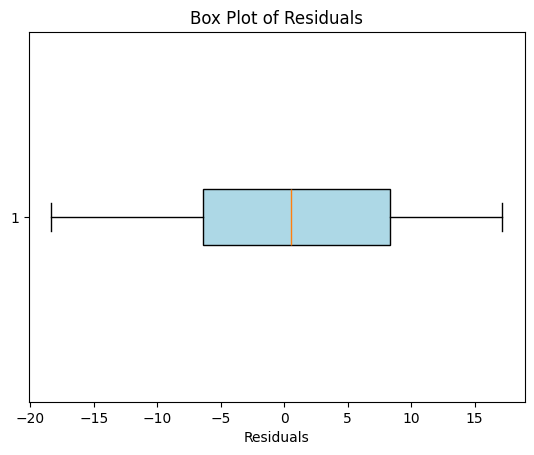

In [33]:
plt.boxplot(residual, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Residuals")
plt.xlabel("Residuals")
plt.show()

The box plot does not show any individual points beyond the whiskers, meaning there are no extreme outliers detected based on the standard 1.5 × IQR rule  
# e. Plot the residuals against 𝑌̂, each of the predictor variables. Is the assumption about independent, identical normal distribution of the errors satisfied?


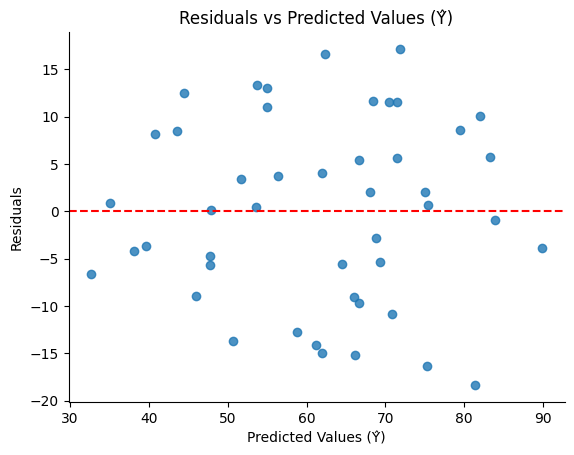

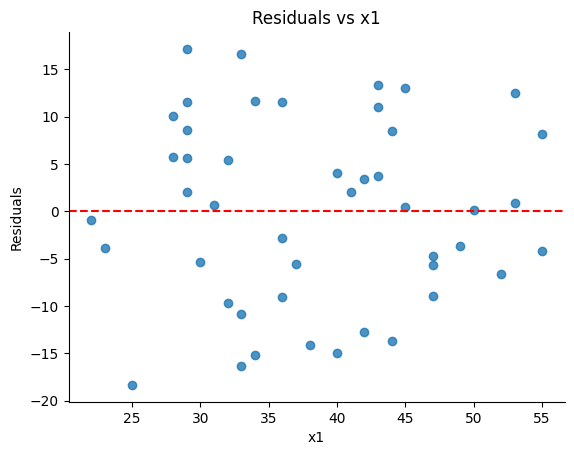

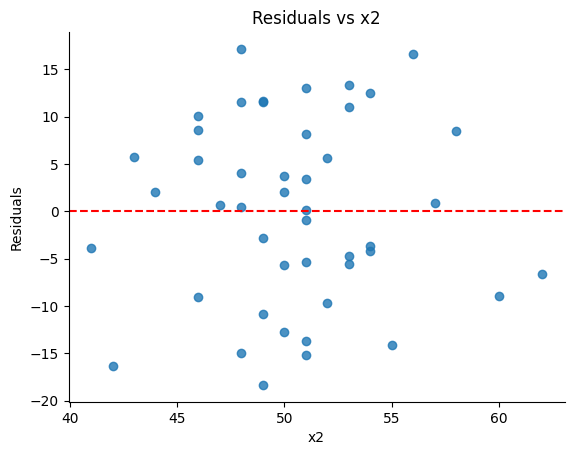

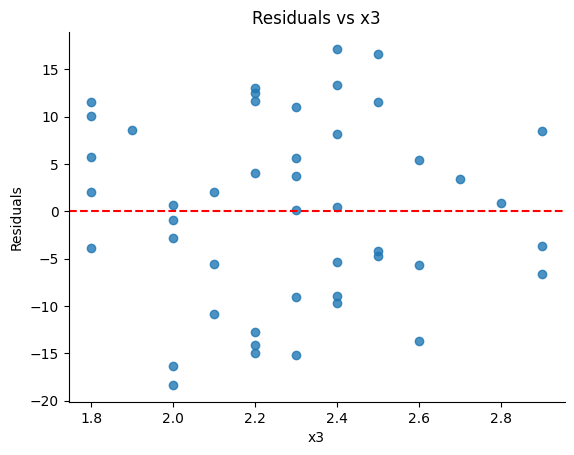

In [34]:
# Plot residuals vs Y_hat
plt.scatter(y_hat, residual, alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (Ŷ)")
plt.xlabel("Predicted Values (Ŷ)")
plt.ylabel("Residuals")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Plot residuals vs each predictor variable
for predictor in ['x1', 'x2', 'x3']:
    plt.scatter(df[predictor], residual, alpha=0.8)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residuals vs {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Residuals")
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

The residuals appear randomly scattered around the red dashed line (which represents zero residual error) --> independent variance  
# f. Test whether there is a regression relation; use α = .10. State the alternatives, decision rule, and conclusion. What does your test imply about 𝛽1, 𝛽2, 𝛽3? What is the P-value of the test?
$$H_0: \beta_1 = \beta_2 = \beta_3=0$$
$$H_a: \text{at least one } \beta_j\neq0$$

In [37]:
SSR = sum((y_hat - np.mean(df['y']))**2)
SSE = sum((df['y'] - y_hat)**2)
F_star = (SSR/4)/(SSE/(len(df)-3))
print("F* = " + str(F_star))
F = stats.f.ppf(q = 1-0.1, dfn=4, dfd = len(df)-3)
p = 1- stats.f.cdf(x = F_star, dfn=1, dfd = len(df)-3)
print(F,F_star, p)

F* = 23.07536078159646
2.080384469522263 23.07536078159646 1.9202925269468096e-05


In [38]:
p_value_b1 = 2 * (1 - stats.t.cdf(abs(t1_star), df=len(df) - 4))
p_value_b2 = 2 * (1 - stats.t.cdf(abs(t2_star), df=len(df) - 4))
p_value_b3 = 2 * (1 - stats.t.cdf(abs(t3_star), df=len(df) - 4))

print(f"P-value for β1: {p_value_b1}")
print(f"P-value for β2: {p_value_b2}")
print(f"P-value for β3: {p_value_b3}")

P-value for β1: 3.8109407942688023e-06
P-value for β2: 0.3740747898315502
P-value for β3: 0.06467742562126033


F* > F --> reject H0, meaning a regression relationship exists  
